This notebook can be run on mybinder: [![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/git/https%3A%2F%2Fgricad-gitlab.univ-grenoble-alpes.fr%2Fai-courses%2Fautonomous_systems_ml/HEAD?filepath=notebooks%2F4_discriminant_analysis)

# LDA binary classification for synthetic data

We consider a binary classification problem 
- $Y \in \{1,2 \}$, 
- the input variables being two-dimensional $X \in \mathbb {R}^2$ $(p = 2)$.

We have a training set of size $n =100$, stored in the Matlab format in the file`synth_train.mat` in the form of a $n \times p $ matrix `Xtrain` and a $n \times 1$ vector `Ytrain`, and $200$ test data `synth_test.mat`.

In [1]:
# Import useful modules
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import scipy.io as spio

## Load and display 'synth_train' dataset

training set size n=100, feature size p=2


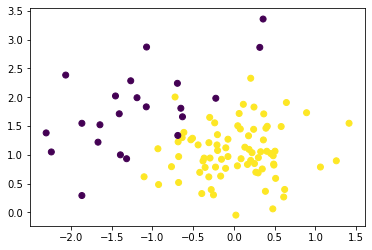

In [2]:
# Warning: put the data files in the notebook directory
data = spio.loadmat("synth_train.mat")
Xtrain = data["Xtrain"]
Ytrain = data["Ytrain"]

# Warning: put the data files in the notebook directory
data = spio.loadmat("synth_test.mat")
Xtest = data["Xtest"]
Ytest = data["Ytest"]

(n, p) = Xtrain.shape
print("training set size n={}, feature size p={}".format(n, p))

# Cast target Y as 1D vector
Ytest = Ytest.ravel()
Ytrain = Ytrain.ravel()

# Display the training set
#color = ["b" if x==1 else "r" for x in Ytrain]
plt.scatter(Xtrain[:, 0], Xtrain[:, 1], c=Ytrain)

## Compute LDA parameter estimators

### Exercise: 
Complete the code below (see `FIXME` tags) to compute the estimators ot the mean vectors

Hint: 
```python
Xtrain[Ytrain == 1]
```
return a  $(n_1 \times 2)$ ndarray with *all the samples from class 1 only*, 

In [3]:
# Get class sizes
n1 = np.sum(Ytrain == 1)
n2 = np.sum(Ytrain == 2)
print((2*"number of class {} samples (training set) n{}={}\n").format(1, 1, n1, 2, 2, n2))

# estimate the class weight
pik = [n1/n, n2/n]
print((2 * "class weight pi{}={}\n").format(1, pik[0], 2, pik[1]))

# estimate the class mean vectors
mu1 = np.zeros((2,))  # FIXME: put the right expression here as a 2D vector
mu2 = np.zeros((2,))  # FIXME: put the right expression here as a 2D vector

print((2 * "class mean mu{}={}\n").format(1, mu1, 2, mu2))

# Compute pooled covariance (see LDA assumption) estimator
Xcentered = [Xtrain[Ytrain == 1]-mu1, Xtrain[Ytrain == 2]-mu2]

# @ for matrix multiplication
SigmaHat = (1./(n-2)) * (Xcentered[0].T @
                         Xcentered[0] + Xcentered[1].T @ Xcentered[1])

print("Pooled covariance estimator SigmaHat")
S_str = np.array2string(SigmaHat, precision=3, separator=', ')
print(' ' + S_str[1:-1])

number of class 1 samples (training set) n1=22
number of class 2 samples (training set) n2=78

class weight pi1=0.22
class weight pi2=0.78

class mean mu1=[0. 0.]
class mean mu2=[0. 0.]

Pooled covariance estimator SigmaHat
 [ 0.624, -0.366],
 [-0.366,  1.86 ]


## Compute and Display LDA decision boundary
**Exercise:** Complete the code below (see `FIXME` tags) to compute the decision boundary

In [4]:
# parameter of the LDA decision boudary: here a simple line

# Constant term (see course)
C = np.log(pik[0]/pik[1]) - 0.5 * mu1.T @ np.linalg.inv(SigmaHat) @ mu1 + \
    0.5*mu2.T @ np.linalg.inv(SigmaHat) @ mu2
print("Constant term C={}".format(C))

# Linear term (see course)
L = np.zeros((2,))  # FIXME: put the right expression here as a 2D vector
print("Linear term L={}".format(L))

Constant term C=-1.2656663733312759
Linear term L=[0. 0.]


/home/chatelaf/miniconda3/envs/calc/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: No contour levels were found within the data range.
  


Text(0, 0.5, '$x_2$')

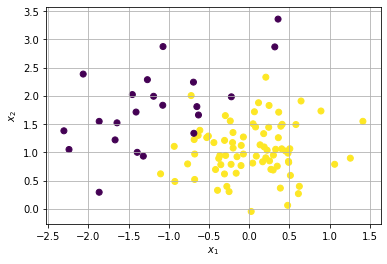

In [5]:
# Plot the decision functions
XX, YY = np.meshgrid(np.linspace(Xtrain[:, 0].min(), Xtrain[:, 0].max(), 200),
                     np.linspace(Xtrain[:, 1].min(), Xtrain[:, 1].max(), 200))
XY = np.vstack([XX.flatten(), YY.flatten()])
yp = np.sign(C + L @ XY)  # yp=-1 for class 1, +1 for class 2
plt.contour(XX, YY, yp.reshape(XX.shape), [0])
plt.scatter(Xtrain[:, 0], Xtrain[:, 1], c=Ytrain)
plt.grid("on")
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')

## Compare with built-in methods from sklearn 

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

model = LDA()
model.fit(Xtrain, Ytrain)

# constant term C
print("Constant term C={}".format(model.intercept_))
# linear term L
print("Linear term L={}".format(model.coef_))

## check LDA decision boundary/classification rule an compute performances

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.metrics import accuracy_score as OA

model = LDA()
model.fit(Xtrain, Ytrain)

# performance on training set
y_pred = model.predict(Xtrain)
oa = OA(Ytrain, y_pred)  # overall accuracy
print("LDA training misclassification error rate = {}".format(1-oa))

# performance on test set: what matters!
y_pred = model.predict(Xtest)
oa = OA(Ytest, y_pred)  # overall accuracy
print("LDA test misclassification error rate = {}".format(1-oa))

# Display the decision functions
XX, YY = np.meshgrid(np.linspace(Xtrain[:, 0].min(), Xtrain[:, 0].max(), 200),
                     np.linspace(Xtrain[:, 1].min(), Xtrain[:, 1].max(), 200))
XY = np.vstack([XX.flatten(), YY.flatten()]).T
yp = model.predict(XY)  # yp=1 for class 1, 2 class 2
plt.contour(XX, YY, yp.reshape(XX.shape), [1.5])
plt.scatter(Xtrain[:, 0], Xtrain[:, 1], c=Ytrain)
plt.grid("on")
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')

## Same for QDA

In [ ]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.metrics import accuracy_score as OA

model = QDA()
model.fit(Xtrain, Ytrain)

# performance on training set
y_pred = model.predict(Xtrain)
oa = OA(Ytrain, y_pred)  # overall accuracy
print("QDA training misclassification error rate = {}".format(1-oa))

# performance on test set: what matters!
y_pred = model.predict(Xtest)
oa = OA(Ytest, y_pred)  # overall accuracy
print("QDA test misclassification error rate = {}".format(1-oa))

# Display the decision functions
XX, YY = np.meshgrid(np.linspace(Xtrain[:, 0].min(), Xtrain[:, 0].max(), 200),
                     np.linspace(Xtrain[:, 1].min(), Xtrain[:, 1].max(), 200))
XY = np.vstack([XX.flatten(), YY.flatten()]).T
yp = model.predict(XY)  # yp=1 for class 1, 2 class 2
plt.contour(XX, YY, yp.reshape(XX.shape), [1.5])
plt.scatter(Xtrain[:, 0], Xtrain[:, 1], c=Ytrain)
plt.grid("on")
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')

### Exercise:
- Why the QDA boundary is no longer a straight line?
- Which model (LDA or QDA) should be preferred on this small dataset?